## Data Acquisition

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df_wine = pd.read_csv('F:\AI Algorithm\Project\winequality-white.csv')

In [8]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df_wine.shape

(4898, 12)

In [10]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Exploratory Data Analysis (EDA)

In [11]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### -> There are no missing values in the dataset
#####    

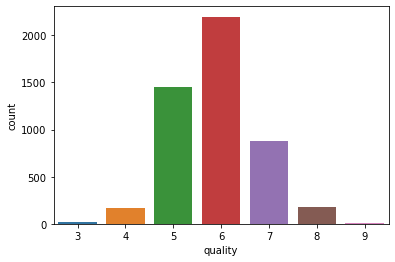

In [12]:
sns.countplot(df_wine['quality'])

##### -> From the above graph, it is clear that the quality rating 5,6, and 7 holds the major proportion of the data.
#####    

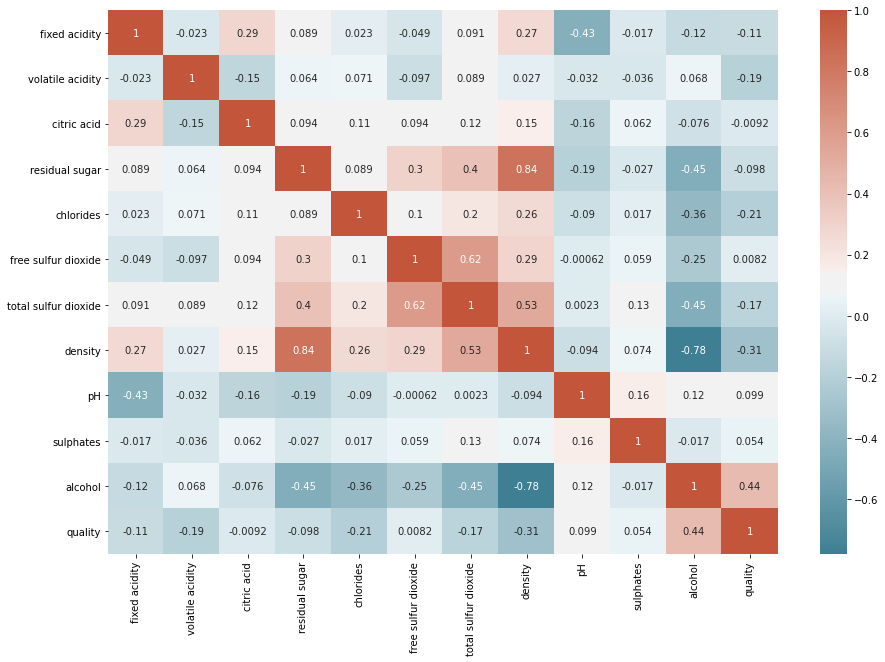

In [13]:
corr = df_wine.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Correlated features

##### -> Residual Sugar and Density, Free Sulfur Dioxide and Total Sulfur Dioxide, Total Sulfur Dioxide and Density, Alcohol and Quality are strongly correlated
##### -> Alcohol is weakly correlated with Density, Residual Sugar and Total Sulfur Dioxide. Also, pH is weakly correlated with Fixed Acidity

In [14]:
df_wine['quality'] = df_wine['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'bad', 7: 'good', 8: 'good', 9: 'good'})

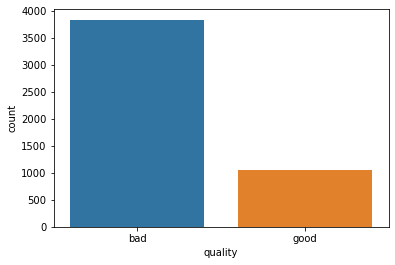

In [15]:
sns.countplot(df_wine['quality'])

##### -> From the above bar graph, it is clear that 80% of wines are of bad quality and only 20% wines are of good quality in the dataset.
#####     

In [16]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


## Statistical Analysis
##### -> There is a large difference between 75% (75th percentile) and max values in Residual Sugar, Free Sulfur Dioxide and Total Sulfur Dioxide.
##### -> From the above statistics, it is clear that there are outliers present in the dataset.
#####    

In [22]:
encode=LabelEncoder()
df_wine['quality']= encode.fit_transform(df_wine['quality'])

## Outlier Management

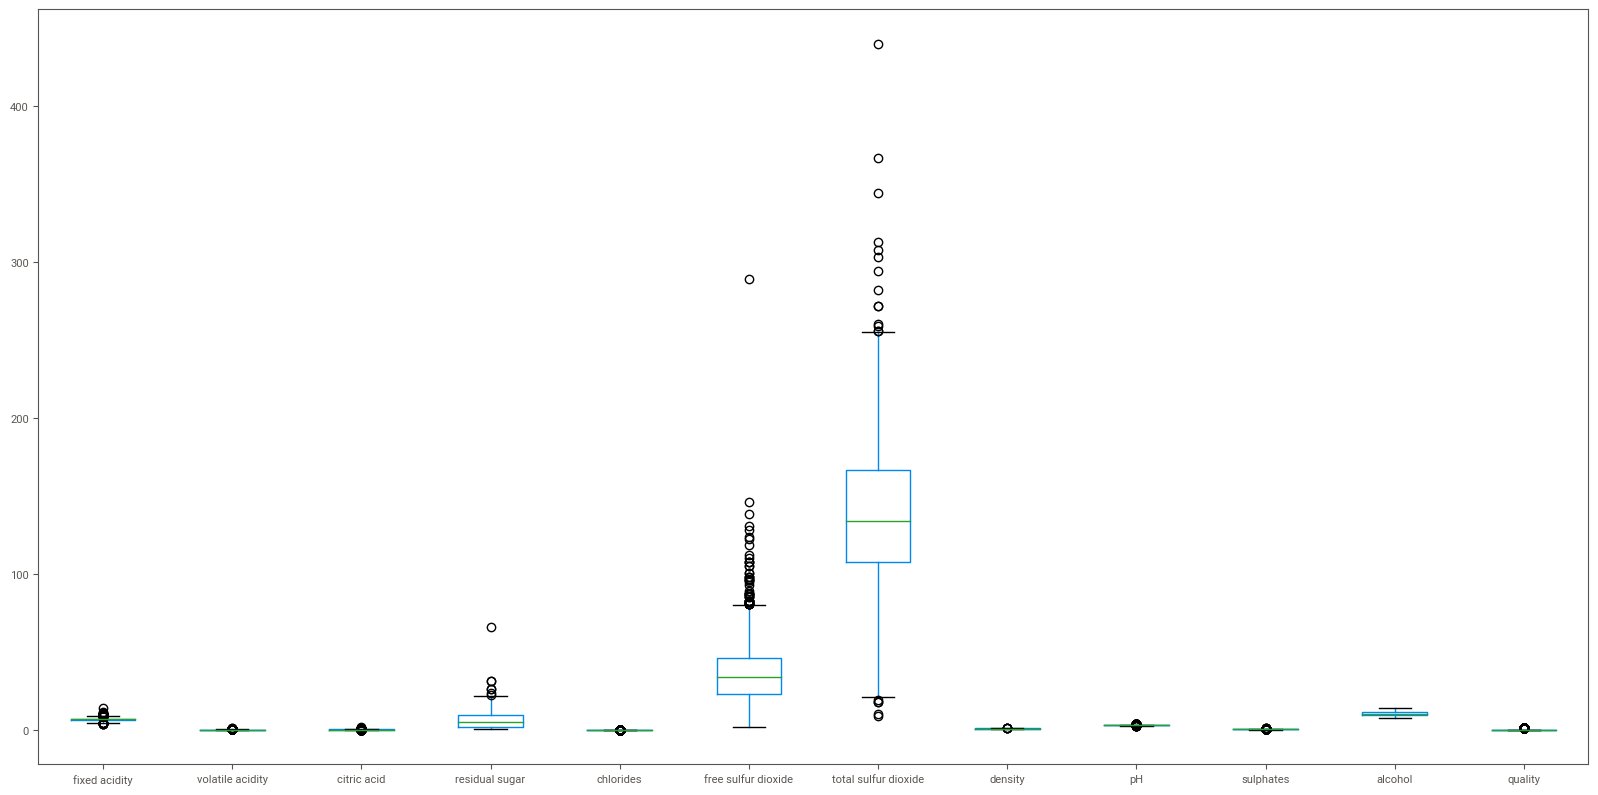

In [25]:
fig = plt.figure(figsize = (20,10))
df_wine.boxplot(column=[name for name in list(df_wine)], grid=False)

In [27]:
Q1 = df_wine.quantile(0.25)
Q3 = df_wine.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [28]:
print("Lower\n\n",lower)

Lower

 fixed acidity            4.800000
volatile acidity         0.045000
citric acid              0.090000
residual sugar         -10.600000
chlorides                0.015000
free sulfur dioxide    -11.500000
total sulfur dioxide    19.500000
density                  0.985156
pH                       2.805000
sulphates                0.200000
alcohol                  6.650000
quality                  0.000000
dtype: float64


In [29]:
print("Upper\n\n", upper)

Upper

 fixed acidity             8.800000
volatile acidity          0.485000
citric acid               0.570000
residual sugar           22.200000
chlorides                 0.071000
free sulfur dioxide      80.500000
total sulfur dioxide    255.500000
density                   1.002666
pH                        3.565000
sulphates                 0.760000
alcohol                  14.250000
quality                   0.000000
dtype: float64


In [30]:
df_wine.shape

(4898, 12)

In [33]:
df_wine_2 = df_wine[~((df_wine < (Q1 - 1.5 * IQR)) |(df_wine > (Q3 + 1.5 * IQR))).any(axis=1)]

In [34]:
df_wine_2.shape

(3065, 12)

##### -> 1833 rows are removed due to the presence of outliers.
#####     

In [35]:
df_wine_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
